# Lab 1 Mashine learning

In [1]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Завантажуємо датасет Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Вибираємо перші дві ознаки для простоти
y = (iris.target != 0) * 1  # Бінаризуємо класи: 0 - не Iris-setosa, 1 - Iris-setosa

# Розділяємо датасет на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизуємо дані
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ініціалізуємо та навчаємо модель логістичної регресії
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Точність: 1.00
Матриця невідповідностей:
[[10  0]
 [ 0 20]]


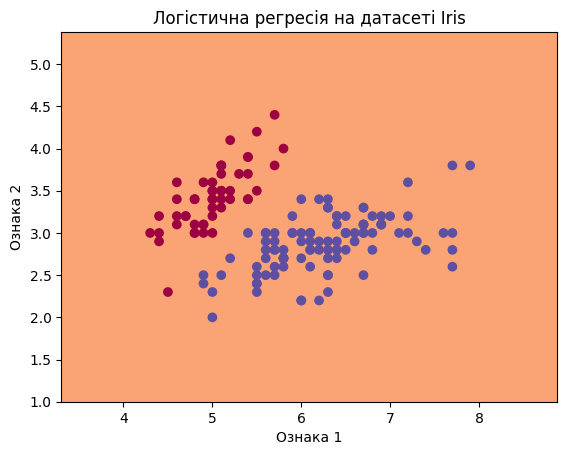

In [2]:
# Перевіряємо точність на тестових данних
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точність: {accuracy:.2f}')

# Оцінюємо матрицю невідповідностей
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матриця невідповідностей:')
print(conf_matrix)

# Виводимо рішаючу поверхню
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Виводимо графік рішаючої поверхні та точок датасету
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Логістична регресія на датасеті Iris')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

## 1 Збереження

In [3]:
import pickle
# Збереження моделі(regr) у файл за допомогою pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Завантаження моделі з файлу
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### check

Точність: 1.00
Матриця невідповідностей:
[[10  0]
 [ 0 20]]


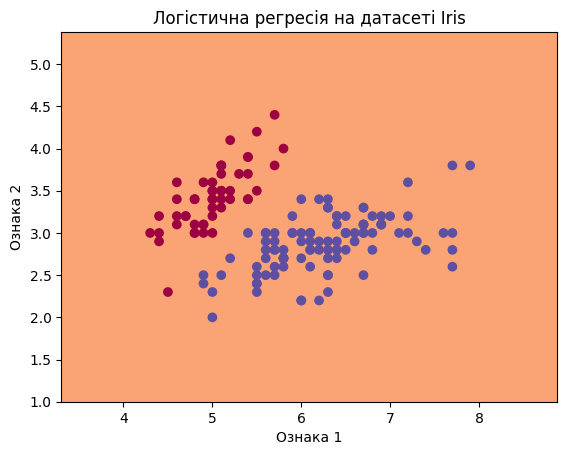

In [8]:
# Перевіряємо точність на тестових данних
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точність: {accuracy:.2f}')

# Оцінюємо матрицю невідповідностей
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матриця невідповідностей:')
print(conf_matrix)

# Виводимо рішаючу поверхню
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = loaded_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Виводимо графік рішаючої поверхні та точок датасету
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Логістична регресія на датасеті Iris')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

## 2 Збереження моделей глибинного навчання - завдання знаходиться у файлі 2_DeepLearn.ipynb

## 3 Пакування

In [5]:
import pickle
from sklearn2pmml import sklearn2pmml
from sklearn2pmml import PMMLPipeline

# Завантаження моделі з файлу
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# PMMLPipeline з моделлю
pipeline = PMMLPipeline([
    ("classifier", loaded_model)
])

# юзаєм функцію sklearn2pmml для експорту моделі у формат PMML
sklearn2pmml(pipeline, "model.pmml", with_repr=True)

## 4 save to DB

In [6]:
import sqlite3
import pickle

# Завантаження моделі з файлу
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Серіалізуємо модель за допомогою pickle
serialized_model = pickle.dumps(loaded_model)

# З'єднання з базою даних SQLite / бд створиться автоматом якщо її не існує
conn = sqlite3.connect('your_database.db')

# Створення таблиці для збереження моделі (якщо вона ще не існує)
conn.execute('''CREATE TABLE IF NOT EXISTS models
                (id INTEGER PRIMARY KEY AUTOINCREMENT,
                model BLOB)''')

# Вставляємо серіалізовану модель в базу даних
conn.execute('INSERT INTO models (model) VALUES (?)', (serialized_model,))

# Зберігаємо зміни та закриваємо з'єднання
conn.commit()
conn.close()


### Заванажуємо з бд модельку

In [7]:
# З'єднання з базою даних
conn = sqlite3.connect('your_database.db')

# Вибираємо серіалізовану модель з бази даних (наприклад, за ідентифікатором 1)
cursor = conn.execute('SELECT model FROM models WHERE id = ?', (1,))
serialized_model = cursor.fetchone()[0]

# Десеріалізуємо модель за допомогою pickle
loaded_model = pickle.loads(serialized_model)

# Закриваємо з'єднання
conn.close()